# Context

What is Abalon?

Abalone is a common name for any of a group of small to very large sea snails, marine gastropod molluscs in the family Haliotidae. Other common names are ear shells, sea ears, and muttonfish or muttonshells in Australia, ormer in the UK, perlemoen in South Africa, and paua in New Zealand.

# Objective
The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope -- a boring and time-consuming task. Other measurements, which are easier to obtain, are used to predict the age.

Your objective is to determine the age of Abalone from the physical measurements.



# Evaluation Criteria
Submissions are evaluated using Root-Mean-Squared-Error (RMSE).

# Came third in this hackathon:
- https://dphi.tech/practice/challenge/25#leaderboard

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from seaborn import pairplot 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn import tree
from sklearn.model_selection import GridSearchCV
le = LabelEncoder()

In [2]:
df_train = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/abalone_data/training_set_label.csv" )

In [3]:
df_train

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,F,0.525,0.400,0.135,0.7140,0.3180,0.1380,0.2080,10
1,F,0.445,0.325,0.125,0.4550,0.1785,0.1125,0.1400,9
2,M,0.710,0.540,0.165,1.9590,0.7665,0.2610,0.7800,18
3,F,0.680,0.580,0.200,1.7870,0.5850,0.4530,0.6000,19
4,M,0.605,0.470,0.160,1.1735,0.4975,0.2405,0.3450,12
...,...,...,...,...,...,...,...,...,...
3127,M,0.415,0.315,0.120,0.4015,0.1990,0.0870,0.0970,8
3128,I,0.325,0.240,0.070,0.1520,0.0565,0.0305,0.0540,8
3129,M,0.565,0.455,0.155,0.9355,0.4210,0.1830,0.2600,11
3130,M,0.610,0.485,0.145,1.3305,0.7830,0.2255,0.2865,9


In [4]:
df_train['age'] = df_train['Rings']+1.5
df_train.drop('Rings', axis = 1, inplace = True)

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3132 entries, 0 to 3131
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             3132 non-null   object 
 1   Length          3132 non-null   float64
 2   Diameter        3132 non-null   float64
 3   Height          3132 non-null   float64
 4   Whole weight    3132 non-null   float64
 5   Shucked weight  3132 non-null   float64
 6   Viscera weight  3132 non-null   float64
 7   Shell weight    3132 non-null   float64
 8   age             3132 non-null   float64
dtypes: float64(8), object(1)
memory usage: 220.3+ KB


In [6]:
df_train[df_train.Sex == 'F'].describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,age
count,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000
mean,0.576886,0.453476,0.156519,1.036233,0.441432,0.228128,0.300260,12.638634
std,0.086207,0.071381,0.029695,0.429709,0.198707,0.097420,0.124293,3.089010
min,0.275000,0.195000,0.015000,0.080000,0.031000,0.021000,0.025000,6.500000
25%,0.520000,0.405000,0.135000,0.714000,0.293500,0.157000,0.210000,10.500000
50%,0.585000,0.465000,0.155000,1.017000,0.435500,0.221000,0.294000,11.500000
75%,0.640000,0.500000,0.175000,1.310500,0.563500,0.293000,0.372500,13.500000
max,0.815000,0.650000,0.250000,2.657000,1.488000,0.590000,1.005000,30.500000


In [7]:
df_train[df_train.Sex == 'M'].describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,age
count,1138.000000,1138.000000,1138.000000,1138.000000,1138.000000,1138.000000,1138.000000,1138.000000
mean,0.564925,0.442465,0.152755,1.006868,0.439529,0.219276,0.286892,12.279438
std,0.100263,0.082502,0.034791,0.470770,0.222322,0.105856,0.130704,3.047504
min,0.155000,0.115000,0.025000,0.024000,0.009000,0.004500,0.005000,5.500000
25%,0.511250,0.400000,0.135000,0.695250,0.285125,0.149000,0.200000,10.500000
50%,0.580000,0.455000,0.155000,0.985000,0.428750,0.212000,0.280000,11.500000
75%,0.630000,0.500000,0.175000,1.277500,0.571875,0.282375,0.364750,13.500000
max,0.780000,0.630000,0.515000,2.825500,1.351000,0.760000,0.897000,28.500000


In [8]:
df_train[df_train.Sex == 'I'].describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,age
count,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000
mean,0.425903,0.325094,0.107438,0.427477,0.189413,0.091529,0.126365,9.360809
std,0.108413,0.087905,0.031348,0.279920,0.126367,0.061567,0.082106,2.469052
min,0.110000,0.090000,0.000000,0.008000,0.002500,0.000500,0.003000,3.500000
25%,0.355000,0.265000,0.085000,0.201500,0.088000,0.042000,0.062500,7.500000
50%,0.435000,0.330000,0.110000,0.383000,0.170000,0.080000,0.111000,9.500000
75%,0.510000,0.390000,0.130000,0.599500,0.270000,0.130500,0.177000,10.500000
max,0.680000,0.530000,0.215000,1.786000,0.715000,0.361500,0.490000,22.500000


There's almost difference in the distribution data of male and female, hence we combine those two values into adult

In [9]:
df_train.Sex.value_counts()

M    1138
I    1013
F     981
Name: Sex, dtype: int64

In [10]:
gender_map = {'M':1, 'F': 1, 'I': 0}
df_train.Sex = df_train.Sex.map(gender_map)

In [11]:
df_train.describe()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,age
count,3132.000000,3132.000000,3132.000000,3132.000000,3132.00000,3132.000000,3132.000000,3132.000000,3132.000000
mean,0.676564,0.523707,0.407952,0.139277,0.82867,0.359229,0.180731,0.239159,11.447957
std,0.467862,0.119891,0.099336,0.038991,0.49063,0.221946,0.109924,0.139040,3.230252
min,0.000000,0.110000,0.090000,0.000000,0.00800,0.002500,0.000500,0.003000,3.500000
25%,0.000000,0.450000,0.350000,0.115000,0.44150,0.185375,0.093375,0.130000,9.500000
50%,1.000000,0.545000,0.425000,0.140000,0.79950,0.335500,0.170000,0.235000,11.500000
75%,1.000000,0.615000,0.480000,0.165000,1.15300,0.499500,0.252500,0.330000,12.500000
max,1.000000,0.815000,0.650000,0.515000,2.82550,1.488000,0.760000,1.005000,30.500000


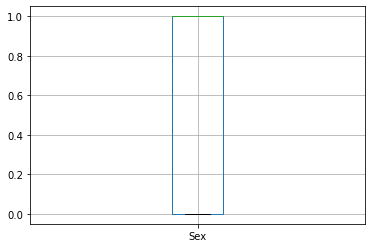

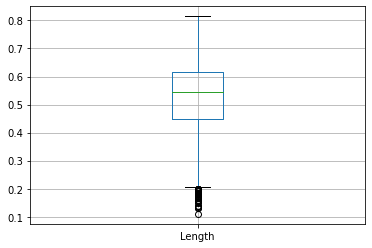

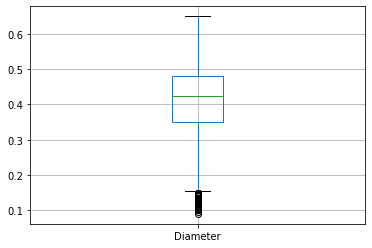

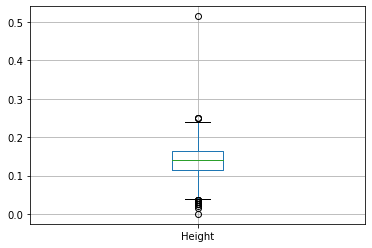

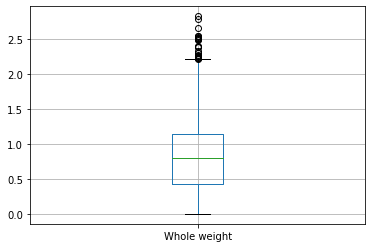

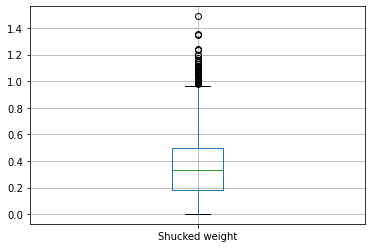

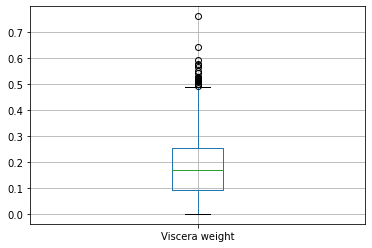

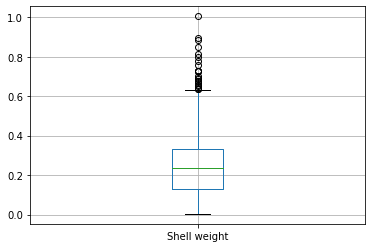

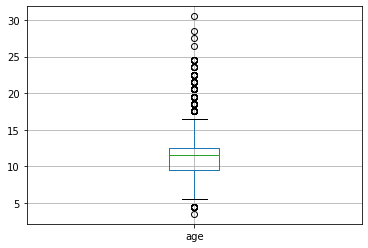

In [12]:
for column in df_train.columns:
    df_train.boxplot([column])
    plt.show()

In [13]:
df_train.drop(1501, inplace=True)

In [14]:
df_train.skew()

Sex              -0.754749
Length           -0.636850
Diameter         -0.604264
Height           -0.250669
Whole weight      0.544219
Shucked weight    0.718566
Viscera weight    0.611135
Shell weight      0.619734
age               1.131665
dtype: float64

In [15]:
df_train["Volume"] = df_train.Length * pow(df_train.Diameter, 2) * 11/14
df_train["VS"] = df_train.Length * df_train.Height
df_train["Surf_area"] = df_train.Diameter * df_train.Length * 22/7
df_train["Whole/Shell"] = df_train["Shell weight"]/df_train["Shucked weight"]
df_train1 = df_train.copy()
df_train = df_train.drop(columns = ["Length", "Diameter", "Viscera weight"])
features1 = df_train1.drop(columns=["age"]).columns

In [16]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3131 entries, 0 to 3131
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             3131 non-null   int64  
 1   Height          3131 non-null   float64
 2   Whole weight    3131 non-null   float64
 3   Shucked weight  3131 non-null   float64
 4   Shell weight    3131 non-null   float64
 5   age             3131 non-null   float64
 6   Volume          3131 non-null   float64
 7   VS              3131 non-null   float64
 8   Surf_area       3131 non-null   float64
 9   Whole/Shell     3131 non-null   float64
dtypes: float64(9), int64(1)
memory usage: 269.1 KB


In [17]:
df_train.corr()

,Sex,Height,Whole weight,Shucked weight,Shell weight,age,Volume,VS,Surf_area,Whole/Shell
Sex,1.000000,0.571121,0.565606,0.529359,0.560941,0.446843,0.551926,0.572055,0.568492,0.010122
Height,0.571121,1.000000,0.886719,0.838224,0.889858,0.598215,0.875504,0.973936,0.898422,-0.067839
Whole weight,0.565606,0.886719,1.000000,0.971012,0.957136,0.534756,0.968488,0.953371,0.960282,-0.192110
Shucked weight,0.529359,0.838224,0.971012,1.000000,0.887923,0.416142,0.942187,0.913990,0.933221,-0.359386
Shell weight,0.560941,0.889858,0.957136,0.887923,1.000000,0.622724,0.939088,0.940254,0.933942,0.028967
age,0.446843,0.598215,0.534756,0.416142,0.622724,1.000000,0.518311,0.572290,0.541842,0.318088
Volume,0.551926,0.875504,0.968488,0.942187,0.939088,0.518311,1.000000,0.955172,0.990320,-0.178316
VS,0.572055,0.973936,0.953371,0.913990,0.940254,0.572290,0.955172,1.000000,0.963301,-0.123310
Surf_area,0.568492,0.898422,0.960282,0.933221,0.933942,0.541842,0.990320,0.963301,1.000000,-0.184872
Whole/Shell,0.010122,-0.067839,-0.192110,-0.359386,0.028967,0.318088,-0.178316,-0.123310,-0.184872,1.000000


In [18]:
df_train

,Sex,Height,Whole weight,Shucked weight,Shell weight,age,Volume,VS,Surf_area,Whole/Shell
0,1,0.135,0.7140,0.3180,0.2080,11.5,0.066000,0.070875,0.660000,0.654088
1,1,0.125,0.4550,0.1785,0.1400,10.5,0.036931,0.055625,0.454536,0.784314
2,1,0.165,1.9590,0.7665,0.7800,19.5,0.162671,0.117150,1.204971,1.017613
3,1,0.200,1.7870,0.5850,0.6000,20.5,0.179734,0.136000,1.239543,1.025641
4,1,0.160,1.1735,0.4975,0.3450,13.5,0.105006,0.096800,0.893671,0.693467
...,...,...,...,...,...,...,...,...,...,...
3127,1,0.120,0.4015,0.1990,0.0970,9.5,0.032354,0.049800,0.410850,0.487437
3128,0,0.070,0.1520,0.0565,0.0540,9.5,0.014709,0.022750,0.245143,0.955752
3129,1,0.155,0.9355,0.4210,0.2600,12.5,0.091904,0.087575,0.807950,0.617577
3130,1,0.145,1.3305,0.7830,0.2865,10.5,0.112740,0.088450,0.929814,0.365900


In [21]:
features = df_train.drop(columns=["age"]).columns

In [22]:
features

Index(['Sex', 'Height', 'Whole weight', 'Shucked weight', 'Shell weight',
       'Volume', 'VS', 'Surf_area', 'Whole/Shell'],
      dtype='object')

In [23]:
features1

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Volume', 'VS', 'Surf_area',
       'Whole/Shell'],
      dtype='object')

In [24]:
X = df_train1[features1]
y = df_train["age"]

In [25]:
y = y-1.5

In [26]:
for column in X.drop(columns=["Sex"]).columns:
     df_train1[column] = df_train1[column].map(lambda i: np.log(i*10) if i > 0 else 0) 

In [27]:
X = df_train1[features1]

In [28]:
X.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Volume', 'VS', 'Surf_area',
       'Whole/Shell'],
      dtype='object')

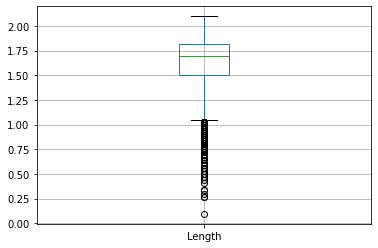

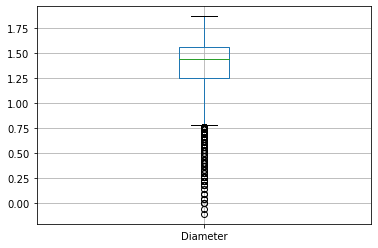

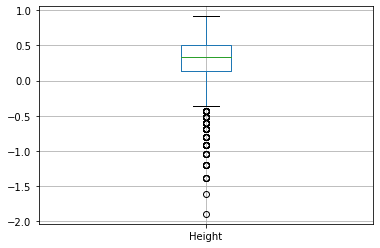

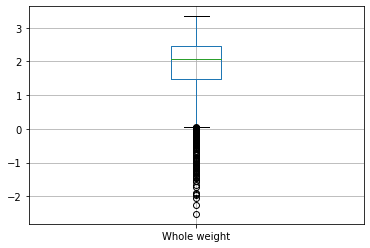

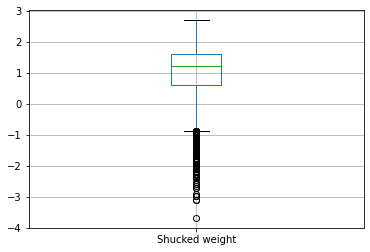

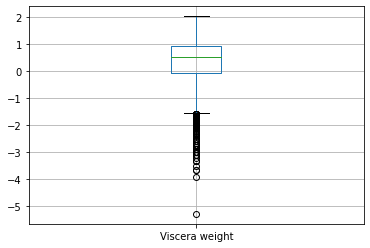

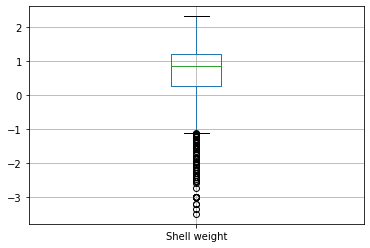

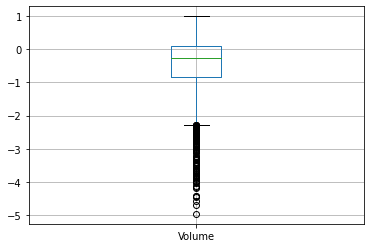

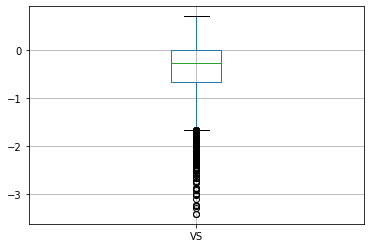

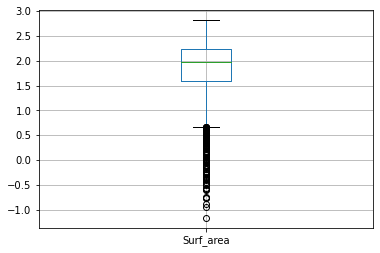

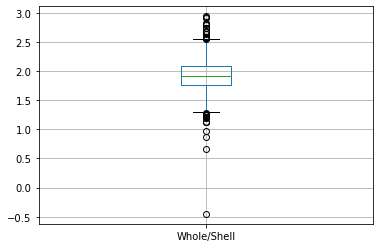

In [29]:
for column in X.drop(columns=["Sex"]).columns:
    X.boxplot([column])
    plt.show()

In [30]:
features1

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Volume', 'VS', 'Surf_area',
       'Whole/Shell'],
      dtype='object')

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 1)

In [32]:
X_train0 = X_train[features1]
X_test0 = X_test[features1]
lin_reg = LinearRegression(normalize=True)
lin_reg.fit(X_test0, y_test).score(X_train0, y_train)

0.5324690604259175

In [33]:
print(f"RMSE_train: {np.sqrt(mean_squared_error(y_train, abs(lin_reg.predict(X_train0))))}")
print(f"RMSE_test: {np.sqrt(mean_squared_error(y_test, abs(lin_reg.predict(X_test0))))}")

RMSE_train: 2.230561146221226
RMSE_test: 2.005870520231655


In [36]:
rf = RandomForestRegressor(n_estimators=1000, max_features=2, oob_score=True, max_depth=11)

In [37]:
print("Accuracy:", rf.fit(X_train, y_train).oob_score_*100)
for feature, imp in zip(X.columns, rf.feature_importances_):
    if imp*100 >= 9:
        print(feature, imp*100, '%')

Accuracy: 55.16363015062284
Shell weight 14.147893974718329 %
VS 10.004941572009669 %
Whole/Shell 14.848640934412686 %


In [38]:
y_pred = abs(rf.predict(X_test))
print(f"RMSE_train: {np.sqrt(mean_squared_error(y_train, abs(rf.predict(X_train))))}")
print(f"RMSE_test: {np.sqrt(mean_squared_error(y_test, y_pred))}")

RMSE_train: 1.2989809614334051
RMSE_test: 1.9942811298399081


In [39]:
tree_features = ["Whole weight", "Shell weight", "VS", "Height"]
X_train1 = X_train[tree_features]
X_test1 = X_test[tree_features]
# tree_features = features
dec_tree = DecisionTreeRegressor(max_leaf_nodes = 10)
# limitations on max leaf node to make simple rules, but this reduces accuracy
dec_tree.fit(X_train1, y_train)

DecisionTreeRegressor(max_leaf_nodes=10)

In [40]:
print("Accuracy:", dec_tree.score(X_test1, y_test)*100)

Accuracy: 37.825545252819616


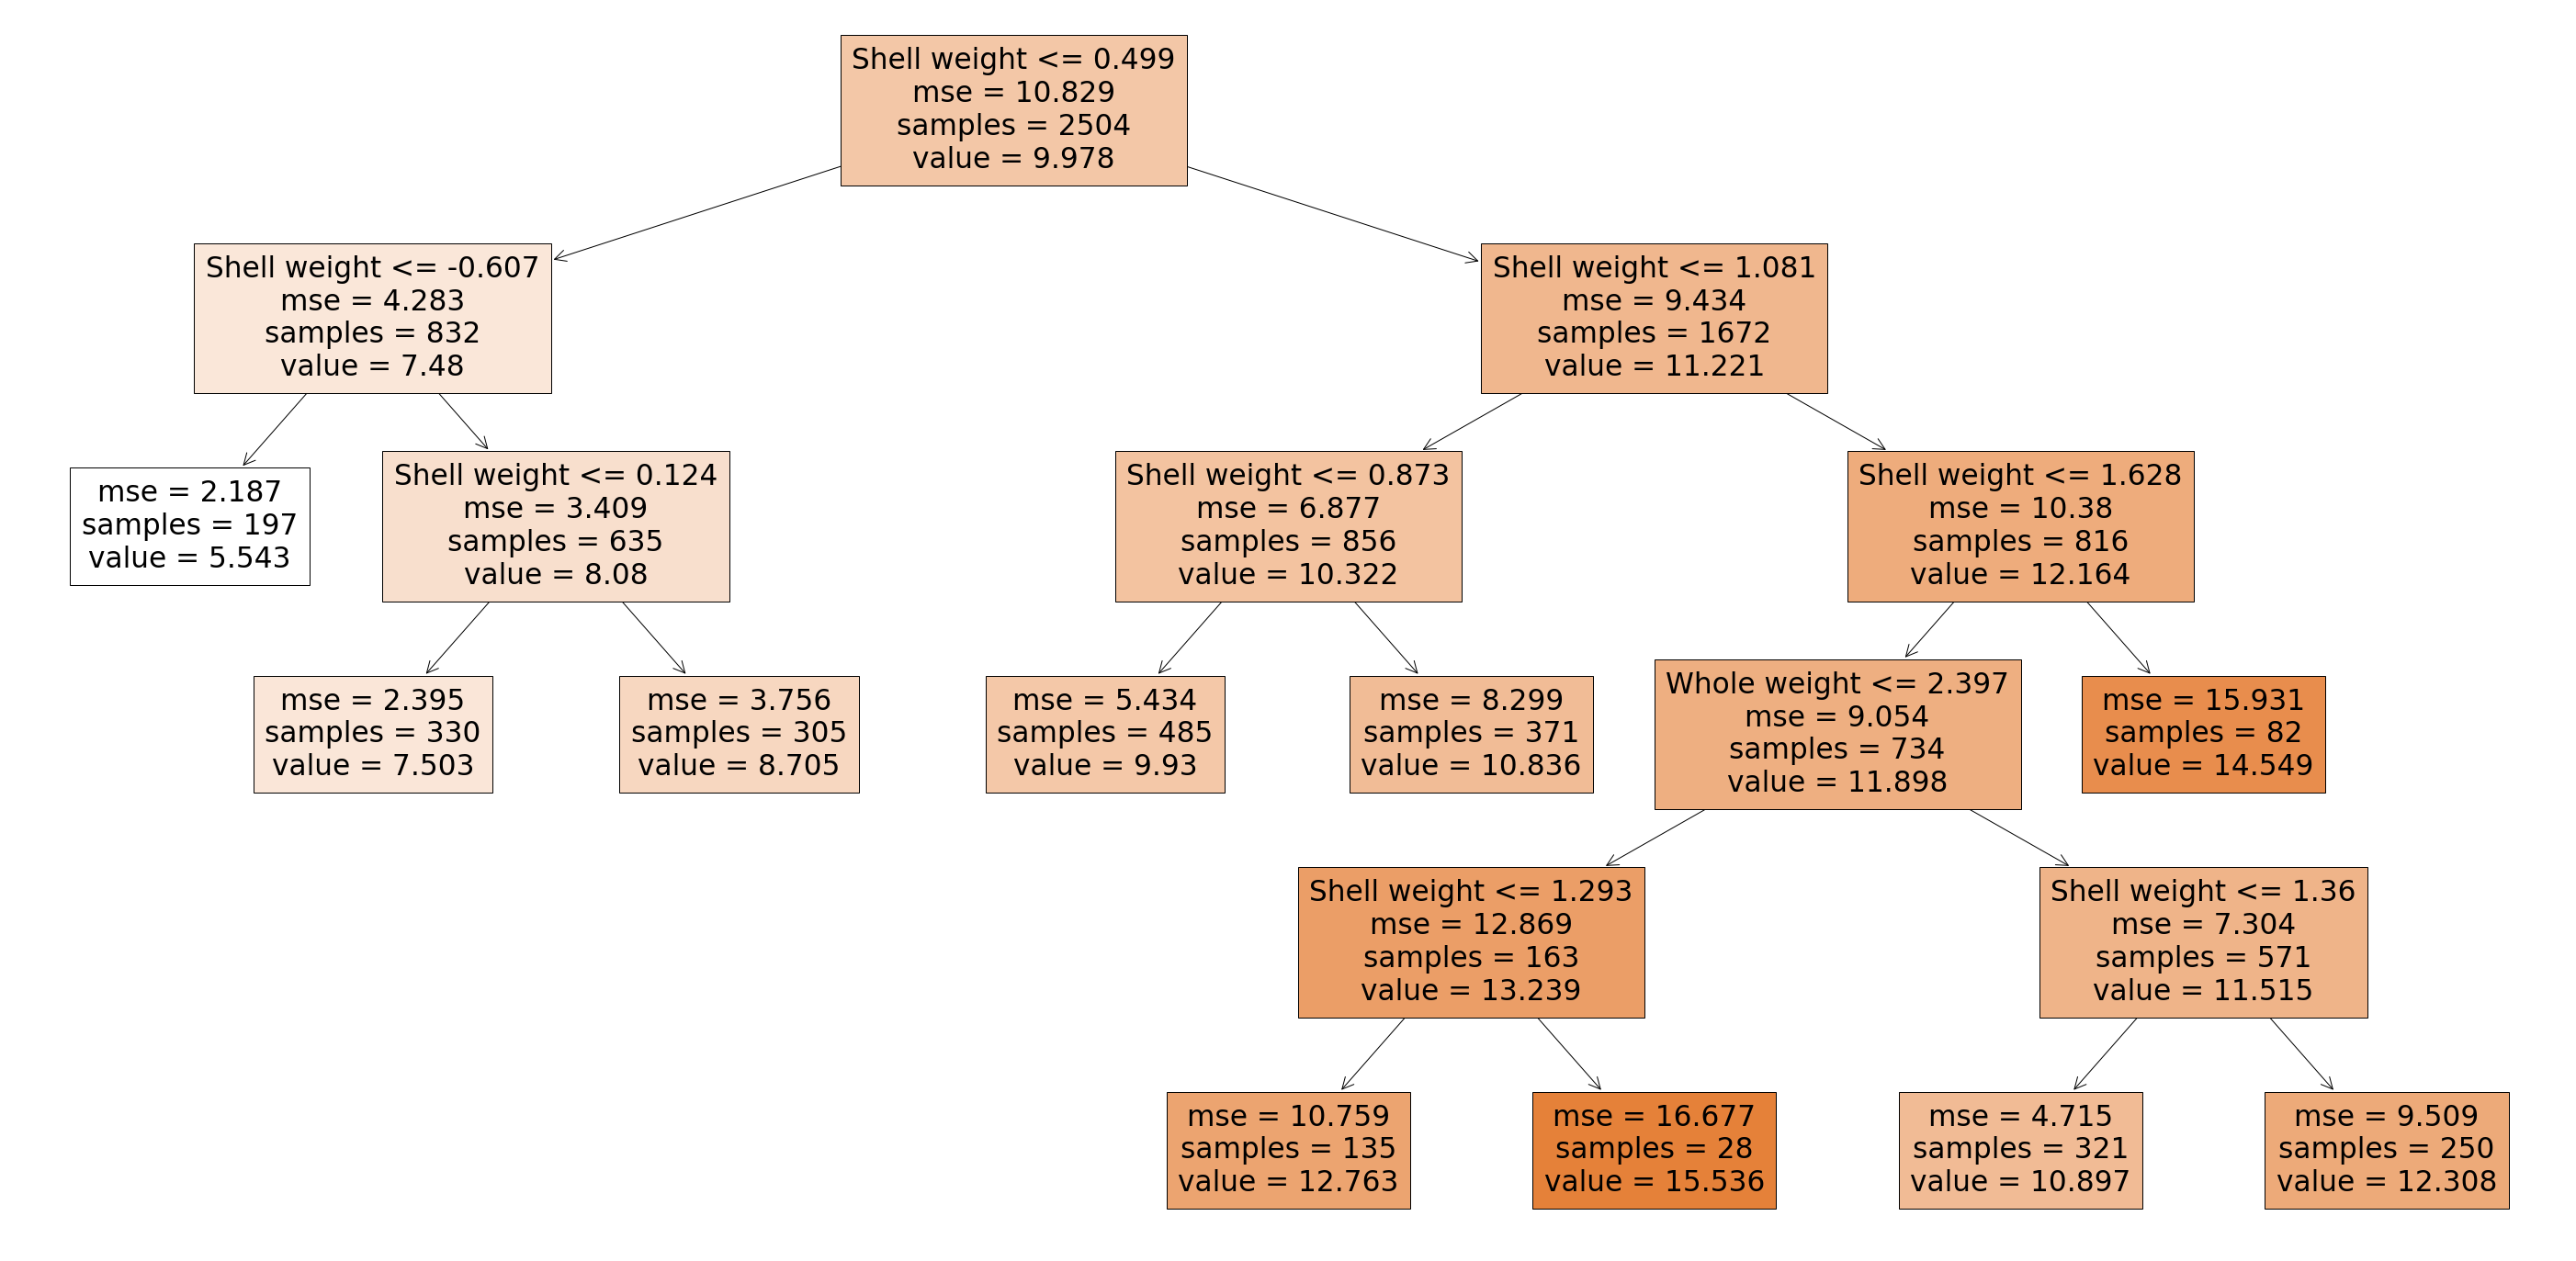

In [41]:
fig = plt.figure(figsize = (50, 25))
_=tree.plot_tree(dec_tree, feature_names = tree_features, filled=True)

In [42]:
y_pred = abs(dec_tree.predict(X_test1))
print(f"RMSE_train: {np.sqrt(mean_squared_error(y_train, abs(dec_tree.predict(X_train1))))}")
print(f"RMSE_test: {np.sqrt(mean_squared_error(y_test, y_pred))}")

RMSE_train: 2.4636320512856895
RMSE_test: 2.3445538846294007


# ==================================================

In [43]:
df_test = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/abalone_data/testing_set_label.csv')

In [44]:
df_test

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,F,0.555,0.445,0.175,1.1465,0.5510,0.2440,0.2785
1,I,0.360,0.270,0.090,0.2190,0.0970,0.0405,0.0650
2,I,0.395,0.320,0.100,0.3075,0.1490,0.0535,0.0900
3,F,0.585,0.450,0.170,0.8685,0.3325,0.1635,0.2700
4,F,0.575,0.460,0.160,1.1030,0.5380,0.2210,0.2490
...,...,...,...,...,...,...,...,...
1039,I,0.270,0.190,0.080,0.0810,0.0265,0.0195,0.0300
1040,I,0.520,0.395,0.115,0.6445,0.3155,0.1245,0.1860
1041,I,0.480,0.355,0.110,0.4495,0.2010,0.0890,0.1400
1042,M,0.665,0.520,0.175,1.3725,0.6060,0.3200,0.3950


In [45]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1044 entries, 0 to 1043
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             1044 non-null   object 
 1   Length          1044 non-null   float64
 2   Diameter        1044 non-null   float64
 3   Height          1044 non-null   float64
 4   Whole weight    1044 non-null   float64
 5   Shucked weight  1044 non-null   float64
 6   Viscera weight  1044 non-null   float64
 7   Shell weight    1044 non-null   float64
dtypes: float64(7), object(1)
memory usage: 65.4+ KB


In [46]:
gender_map = {'M':1, 'F': 1, 'I': 0}
df_test.Sex = df_test.Sex.map(gender_map)

In [47]:
df_test["Volume"] = df_test.Length * pow(df_test.Diameter, 2) * 11/14
df_test["VS"] = df_test.Length * df_test.Height
df_test["Surf_area"] = df_test.Diameter * df_test.Length * 22/7
df_test["Whole/Shell"] = df_test["Shell weight"]/df_test["Shucked weight"]

In [48]:
X.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Volume', 'VS', 'Surf_area',
       'Whole/Shell'],
      dtype='object')

In [49]:
df_test

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Volume,VS,Surf_area,Whole/Shell
0,1,0.555,0.445,0.175,1.1465,0.5510,0.2440,0.2785,0.086353,0.097125,0.776207,0.505445
1,0,0.360,0.270,0.090,0.2190,0.0970,0.0405,0.0650,0.020620,0.032400,0.305486,0.670103
2,0,0.395,0.320,0.100,0.3075,0.1490,0.0535,0.0900,0.031781,0.039500,0.397257,0.604027
3,1,0.585,0.450,0.170,0.8685,0.3325,0.1635,0.2700,0.093078,0.099450,0.827357,0.812030
4,1,0.575,0.460,0.160,1.1030,0.5380,0.2210,0.2490,0.095598,0.092000,0.831286,0.462825
...,...,...,...,...,...,...,...,...,...,...,...,...
1039,0,0.270,0.190,0.080,0.0810,0.0265,0.0195,0.0300,0.007658,0.021600,0.161229,1.132075
1040,0,0.520,0.395,0.115,0.6445,0.3155,0.1245,0.1860,0.063747,0.059800,0.645543,0.589540
1041,0,0.480,0.355,0.110,0.4495,0.2010,0.0890,0.1400,0.047529,0.052800,0.535543,0.696517
1042,1,0.665,0.520,0.175,1.3725,0.6060,0.3200,0.3950,0.141284,0.116375,1.086800,0.651815


In [50]:
for column in X.drop(columns=["Sex"]).columns:
     df_test[column] = df_test[column].map(lambda i: np.log(i*10) if i > 0 else 0) 

In [51]:
df_test

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Volume,VS,Surf_area,Whole/Shell
0,1,1.713798,1.492904,0.559616,2.439299,1.706565,0.891998,1.024248,-0.146726,-0.029171,2.049249,1.620268
1,0,1.280934,0.993252,-0.105361,0.783902,-0.030459,-0.903868,-0.430783,-1.578895,-1.127012,1.116733,1.902261
2,0,1.373716,1.163151,0.000000,1.123305,0.398776,-0.625489,-0.105361,-1.146315,-0.928870,1.379414,1.798448
3,1,1.766442,1.504077,0.530628,2.161597,1.201470,0.491643,0.993252,-0.071736,-0.005515,2.113066,2.094367
4,1,1.749200,1.526056,0.470004,2.400619,1.682688,0.792993,0.912283,-0.045020,-0.083382,2.117803,1.532179
...,...,...,...,...,...,...,...,...,...,...,...,...
1039,0,0.993252,0.641854,-0.223144,-0.210721,-1.328025,-1.634756,-1.203973,-2.569373,-1.532477,0.477653,2.426638
1040,0,1.648659,1.373716,0.139762,1.863305,1.148988,0.219136,0.620576,-0.450242,-0.514165,1.864921,1.774173
1041,0,1.568616,1.266948,0.095310,1.502966,0.698135,-0.116534,0.336472,-0.743821,-0.638659,1.678111,1.940923
1042,1,1.894617,1.648659,0.559616,2.619219,1.801710,1.163151,1.373716,0.345602,0.151648,2.385823,1.874591


In [52]:
y

0       10.0
1        9.0
2       18.0
3       19.0
4       12.0
        ... 
3127     8.0
3128     8.0
3129    11.0
3130     9.0
3131    12.0
Name: age, Length: 3131, dtype: float64

In [53]:
X_train0 = X_train[features1]
X_test0 = X_test[features1]
lin_reg = LinearRegression(normalize=True)
y_pred = lin_reg.fit(X_test0, y_test).predict(df_test[features1])

In [57]:
rf = RandomForestRegressor(n_estimators=1000, max_features=2, oob_score=True, max_depth=10)
print("Accuracy:", rf.fit(df_train1[features1], y).oob_score_*100)
y_pred = abs(rf.predict(df_test[features1]))

Accuracy: 55.245221254372446


In [58]:
y_pred

array([ 9.89819596,  6.61303984,  7.06607305, ...,  8.42475647,
       10.84940427,  8.8893785 ])

In [59]:
ans = pd.DataFrame([y_pred])

In [60]:
ans = ans.melt()[["value"]]

In [61]:
ans.to_csv("Submission.csv", index=False)